# **Data Understanding**

## Sumber Data

Dataset yang digunakan dalam proyek ini adalah **Heart Disease Dataset**, yang berasal dari UCI Machine Learning Repository dan juga tersedia dalam bentuk yang lebih terstruktur di **Kaggle** (https://www.kaggle.com/datasets/data855/heart-disease?resource=download). Dataset ini merupakan salah satu dataset kesehatan yang cukup populer dan sering digunakan dalam penelitian maupun pembelajaran di bidang data science.


Jumlah data yang tersedia adalah **303 catatan pasien**, dengan setiap pasien memiliki informasi kesehatan yang direkam melalui berbagai pengukuran medis. Data ini berbentuk tabular dengan 14 atribut, di mana 13 atribut berfungsi sebagai variabel prediktor (fitur), sementara 1 atribut lainnya adalah target yang menunjukkan apakah pasien tersebut terdiagnosis memiliki penyakit jantung atau tidak. Dataset ini sudah berbentuk numerik sehingga relatif mudah untuk diproses, baik untuk analisis eksploratif maupun untuk membangun model prediktif.

In [1]:
!pip install pymysql
!pip install pandas
!pip install sqlalchemy
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.8 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving .env to .env


In [13]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()

# Ambil variabel koneksi dari lingkungan
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_PORT = os.getenv("MYSQL_PORT")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
MYSQL_DATABASE = os.getenv("MYSQL_DATABASE")

# Gunakan SQLAlchemy untuk koneksi ke MySQL
mysql_engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")

# Jalankan query
mysql_query = "SELECT * FROM heart_disease;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

# Drop the 'id' and 'no' columns from the DataFrame
df_mysql = df_mysql.drop(columns=['no', 'id'])

# Print hasil
print("Data dari MySQL:")
print(df_mysql.head())

Data dari MySQL:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


## Deskripsi Atribut

Secara umum, dataset ini berisi informasi medis yang dikumpulkan dari pasien melalui pemeriksaan klinis. Berikut adalah deskripsi dari masing-masing atribut yang ada:

*   `age`: Menyatakan usia pasien dalam tahun. Umur menjadi salah satu faktor risiko penting dalam penyakit jantung karena semakin bertambahnya usia, risiko seseorang terkena penyakit kardiovaskular juga meningkat.

*   `sex`: Menunjukkan jenis kelamin pasien, di mana nilai 1 merepresentasikan pria dan 0 merepresentasikan wanita. Faktor jenis kelamin sering dikaitkan dengan perbedaan risiko penyakit jantung.

*   `cp` (chest pain type): Merupakan tipe nyeri dada yang dialami pasien, dikategorikan ke dalam 4 tipe (0–3). Nyeri dada menjadi indikator klinis yang paling sering terkait dengan masalah jantung.

*   `trestbps` (resting blood pressure): Tekanan darah saat pasien dalam kondisi istirahat, diukur dalam mm Hg. Tekanan darah tinggi menjadi faktor risiko utama penyakit jantung.

*   `chol` (serum cholesterol): Kadar kolesterol serum pasien dalam mg/dl. Kadar kolesterol yang tinggi dapat menyebabkan penyumbatan pembuluh darah, yang meningkatkan risiko penyakit jantung.

*   `fbs` (fasting blood sugar): Menunjukkan apakah kadar gula darah puasa pasien lebih dari 120 mg/dl (1 = ya, 0 = tidak). Kondisi gula darah tinggi dapat mengindikasikan adanya diabetes, yang juga merupakan faktor risiko penyakit jantung.

*   `restecg` (resting electrocardiographic results): Hasil pemeriksaan elektrokardiogram dalam kondisi istirahat, dengan nilai 0–2 yang menggambarkan kondisi jantung pasien.

*   `thalach` (maximum heart rate achieved): Detak jantung maksimal yang dicapai pasien saat menjalani tes. Pasien dengan detak jantung maksimal yang lebih rendah biasanya lebih rentan terhadap penyakit jantung.

*   `exang` (exercise induced angina): Menunjukkan apakah pasien mengalami angina (nyeri dada) yang dipicu oleh olahraga (1 = ya, 0 = tidak).

*   `oldpeak`: Besarnya depresi segmen ST yang terjadi akibat aktivitas fisik dibandingkan dengan kondisi istirahat. Nilai ini diukur dalam satuan desimal.

*   `slope`: Menyatakan kemiringan segmen ST pada grafik EKG saat olahraga, dikategorikan dengan nilai 0–2.

*   `ca`: Jumlah pembuluh darah utama (0–4) yang terlihat melalui fluoroskopi. Semakin banyak pembuluh darah yang tersumbat, semakin besar risiko penyakit jantung.

*   `thal`: Kondisi thalassemia pasien, biasanya dikategorikan sebagai normal, fixed defect, atau reversible defect (direpresentasikan dengan angka 0–3).

*   `target`: Variabel keluaran (label) yang menunjukkan ada atau tidaknya penyakit jantung pada pasien. Nilai 1 berarti pasien terdiagnosis memiliki penyakit jantung, sedangkan nilai 0 berarti tidak.



In [14]:
df_mysql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df_mysql.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Analisis Target

Kolom `target` merupakan variabel keluaran (label) yang menunjukkan apakah pasien terdiagnosis penyakit jantung atau tidak. Nilai 1 berarti pasien positif mengidap penyakit jantung, sedangkan nilai 0 berarti tidak.

Distribusi kelas target dalam dataset ini cukup seimbang:

*   54,4% pasien (165 orang) memiliki penyakit jantung.

*   45,6% pasien (138 orang) tidak memiliki penyakit jantung.

Keseimbangan ini sangat baik untuk tujuan analisis klasifikasi, karena model machine learning yang dibangun tidak akan terlalu bias terhadap salah satu kelas.

In [16]:
print(df_mysql['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


In [17]:
print(df_mysql.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Insight Awal

*   Usia paruh baya hingga lanjut merupakan kelompok dengan risiko tertinggi terkena penyakit jantung.

*   Pasien pria lebih dominan dibandingkan wanita, dan mereka juga lebih sering ditemukan pada kelompok yang menderita penyakit jantung.

*   Tekanan darah tinggi dan kadar kolesterol tinggi muncul sebagai pola yang cukup konsisten di antara pasien berpenyakit jantung.

*   Detak jantung maksimal yang lebih rendah cenderung mengindikasikan pasien dengan kondisi jantung yang buruk.

*   Distribusi data target yang seimbang memberikan peluang yang baik untuk melakukan analisis prediktif dengan hasil yang lebih akurat.





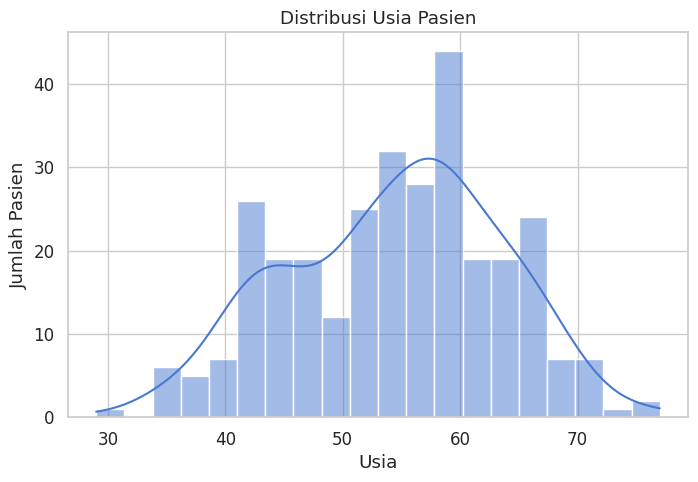

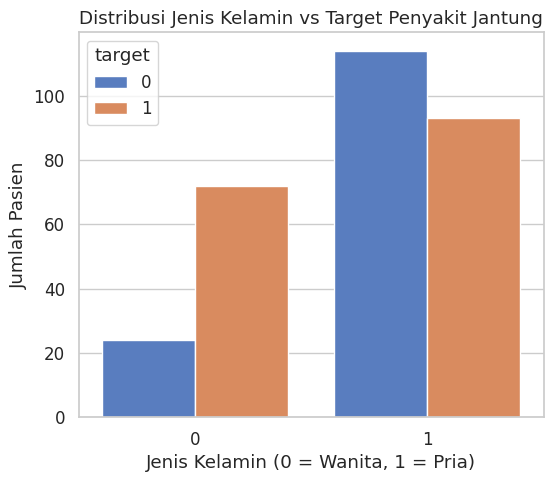

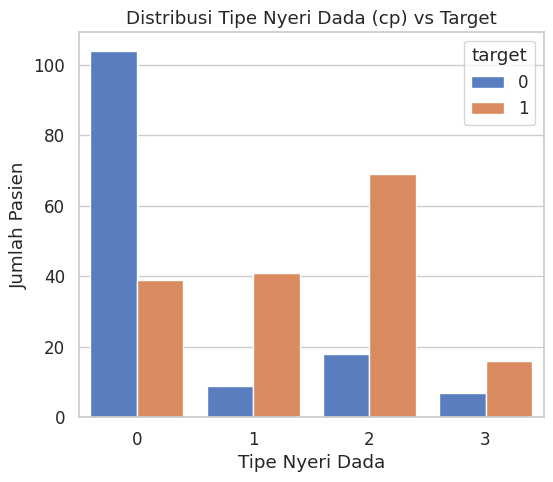

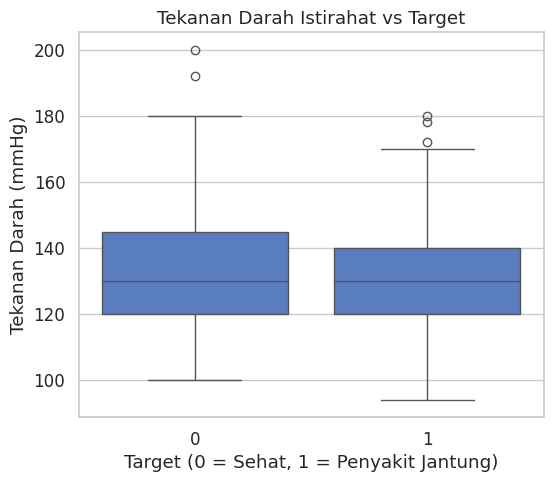

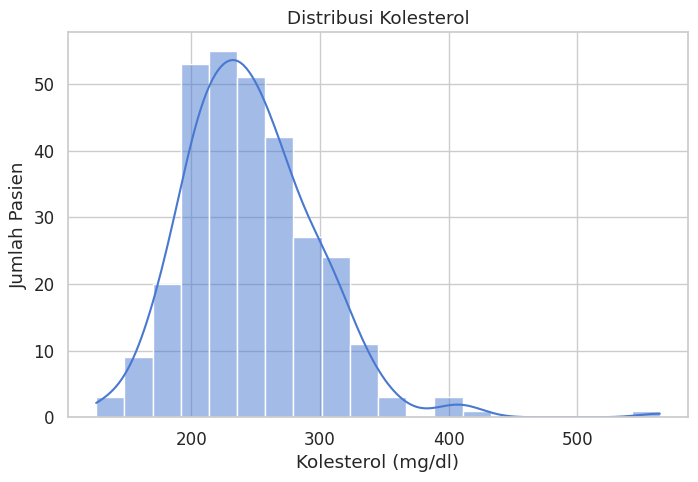

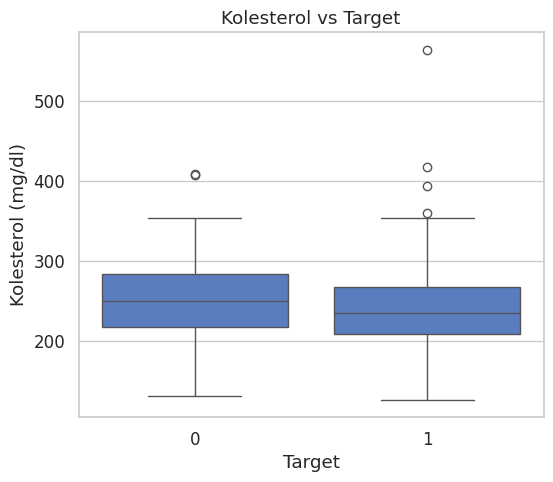

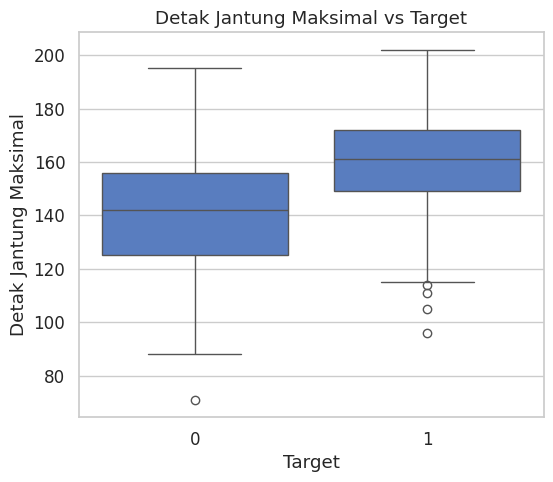

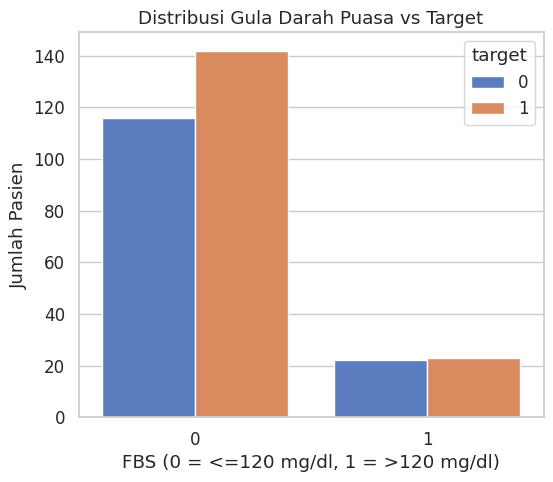

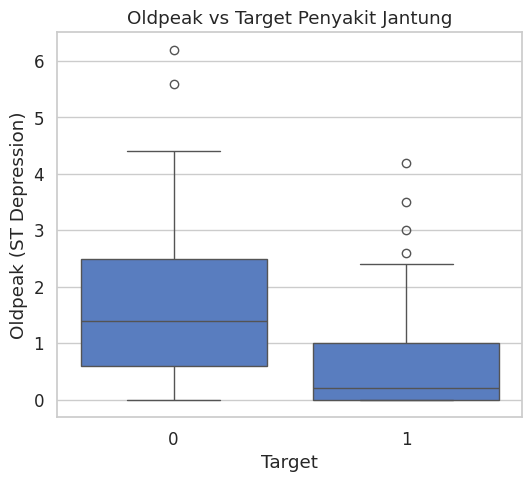

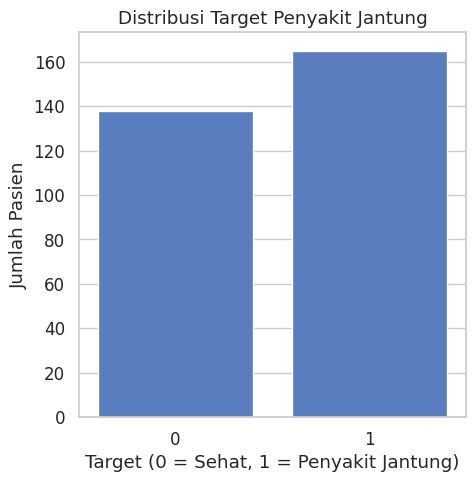

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style biar lebih rapi
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Distribusi Usia
plt.figure(figsize=(8,5))
sns.histplot(df_mysql['age'], bins=20, kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pasien")
plt.show()

# 2. Jenis Kelamin vs Target
plt.figure(figsize=(6,5))
sns.countplot(data=df_mysql, x='sex', hue='target')
plt.title("Distribusi Jenis Kelamin vs Target Penyakit Jantung")
plt.xlabel("Jenis Kelamin (0 = Wanita, 1 = Pria)")
plt.ylabel("Jumlah Pasien")
plt.show()

# 3. Tipe Nyeri Dada (cp)
plt.figure(figsize=(6,5))
sns.countplot(data=df_mysql, x='cp', hue='target')
plt.title("Distribusi Tipe Nyeri Dada (cp) vs Target")
plt.xlabel("Tipe Nyeri Dada")
plt.ylabel("Jumlah Pasien")
plt.show()

# 4. Tekanan Darah (trestbps) per Target
plt.figure(figsize=(6,5))
sns.boxplot(data=df_mysql, x='target', y='trestbps')
plt.title("Tekanan Darah Istirahat vs Target")
plt.xlabel("Target (0 = Sehat, 1 = Penyakit Jantung)")
plt.ylabel("Tekanan Darah (mmHg)")
plt.show()

# 5. Kolesterol (chol)
plt.figure(figsize=(8,5))
sns.histplot(df_mysql['chol'], bins=20, kde=True)
plt.title("Distribusi Kolesterol")
plt.xlabel("Kolesterol (mg/dl)")
plt.ylabel("Jumlah Pasien")
plt.show()

# Kolesterol vs Target
plt.figure(figsize=(6,5))
sns.boxplot(data=df_mysql, x='target', y='chol')
plt.title("Kolesterol vs Target")
plt.xlabel("Target")
plt.ylabel("Kolesterol (mg/dl)")
plt.show()

# 6. Detak Jantung Maksimal (thalach)
plt.figure(figsize=(6,5))
sns.boxplot(data=df_mysql, x='target', y='thalach')
plt.title("Detak Jantung Maksimal vs Target")
plt.xlabel("Target")
plt.ylabel("Detak Jantung Maksimal")
plt.show()

# 7. Gula Darah Puasa (fbs)
plt.figure(figsize=(6,5))
sns.countplot(data=df_mysql, x='fbs', hue='target')
plt.title("Distribusi Gula Darah Puasa vs Target")
plt.xlabel("FBS (0 = <=120 mg/dl, 1 = >120 mg/dl)")
plt.ylabel("Jumlah Pasien")
plt.show()

# 8. Oldpeak vs Target
plt.figure(figsize=(6,5))
sns.boxplot(data=df_mysql, x='target', y='oldpeak')
plt.title("Oldpeak vs Target Penyakit Jantung")
plt.xlabel("Target")
plt.ylabel("Oldpeak (ST Depression)")
plt.show()

# 9. Distribusi Target
plt.figure(figsize=(5,5))
sns.countplot(data=df_mysql, x='target')
plt.title("Distribusi Target Penyakit Jantung")
plt.xlabel("Target (0 = Sehat, 1 = Penyakit Jantung)")
plt.ylabel("Jumlah Pasien")
plt.show()
